In [184]:
from datetime import date, datetime, timedelta
# import pandas as pd
import numpy as np
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19model.data.mobility import * # contains all necessary functions
from covid19model.visualization.output import *
from covid19model.data.sciensano import get_sciensano_COVID19_data_spatial

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
# Import Sciensano data
sciensano_df = get_sciensano_COVID19_data_spatial(agg='arr', values='hospitalised_IN', moving_avg=True).sum(axis=1)
sciensano_values= sciensano_df.values
sciensano_dates = sciensano_df.index

# Timeline of global and national events

<IPython.core.display.Javascript object>


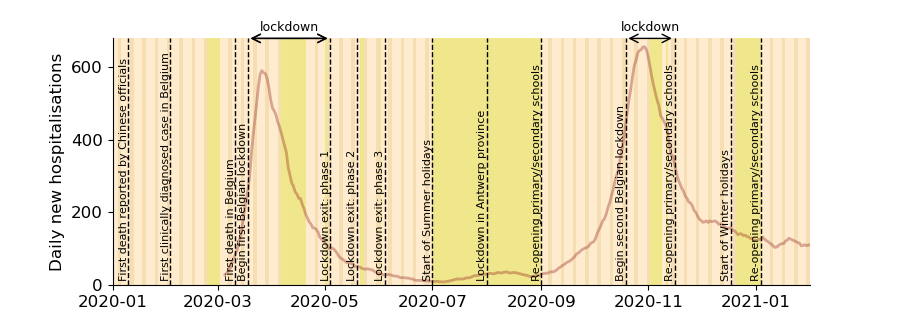

In [225]:
############################
# Copied from timeline.pdf #
############################

t1 = pd.Timestamp(2020, 1, 10, 0, 0) # First death in China
t1_name = 'First death reported by Chinese officials'
t2 = pd.Timestamp(2020, 2, 3, 0, 0) # First case in BE
t2_name = 'First clinically diagnosed case in Belgium'
t3 = pd.Timestamp(2020, 3, 11, 0, 0) # First three deaths in BE
t3_name = 'First death in Belgium'
t4 = pd.Timestamp(2020, 3, 18, 0, 0) # Begin lockdown
t4_name = 'Begin first Belgian lockdown'
t5 = pd.Timestamp(2020, 5, 4, 0, 0) #
t5_name = 'Lockdown exit: phase 1'
t6 = pd.Timestamp(2020, 5, 19, 0, 0) #
t6_name = 'Lockdown exit: phase 2'
t7 = pd.Timestamp(2020, 6, 4, 0, 0) #
t7_name = 'Lockdown exit: phase 3'
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t8_name = 'Start of Summer holidays'
t9 = pd.Timestamp(2020, 8, 1, 0, 0)
t9_name = 'Lockdown in Antwerp province'
t9p1 = pd.Timestamp(2020, 9, 1, 0, 0)
t9p1_name = 'Re-opening primary/secondary schools'
t10 = pd.Timestamp(2020, 10, 19, 0, 0)
t10_name = 'Begin second Belgian lockdown'
t11 = pd.Timestamp(2020, 11, 16, 0, 0)
t11_name = 'Re-opening primary/secondary schools'
t12 = pd.Timestamp(2020, 12, 18, 0, 0)
t12_name = 'Start of Winter holidays'
t13 = pd.Timestamp(2021, 1, 4, 0, 0)
t13_name = 'Re-opening primary/secondary schools'



start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2021, 2, 1, 0, 0)
fig, ax = plt.subplots(figsize=(9,3.2))
ax.grid(False)
ticklabelsize = 12
ax.set_xlim(start_date, end_date)
ylim=680
ax.set_ylim(0, ylim)
# Overlay hospitalisations
ax.grid(False)
ax.set_ylabel('Daily new hospitalisations', size=ticklabelsize)
plt.setp(ax.get_xticklabels(), Fontsize=ticklabelsize)
ax.plot(sciensano_dates, sciensano_values, linewidth=2, color='maroon', alpha=0.3)
plt.setp(ax.get_yticklabels(), Fontsize=ticklabelsize)
color_timeframes(start_date, end_date, ax=ax)
# ax.set_title('test', size=14)

# Add arrows denoting lockdown periods
label_lockdown_size = 9
label_lockdown_move_up = 20
arrow_height = ylim
# First lockdown
ax.annotate(s='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))
label_lockdown1_move_right = 7 # days
ax.text(t4 + pd.Timedelta(days=label_lockdown1_move_right), \
        ylim + label_lockdown_move_up, 'lockdown', size=label_lockdown_size)
ax.annotate(s='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))
# second lockdown
label_lockdown1_move_right = -2.5 # days
ax.text(t10 + pd.Timedelta(days=label_lockdown1_move_right), \
        ylim + label_lockdown_move_up, 'lockdown', size=label_lockdown_size)
ax.annotate(s='', xy=(t10, arrow_height), xytext=(t11,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))

# ax.annotate(s='', xy=(start_calibration_wave2,arrow_height), xytext=(end_calibration_wave2,arrow_height), \
#             arrowprops=dict(arrowstyle='<->'))
# label_cal2_move_right = 41 # days
# ax.text(start_calibration_wave2 + pd.Timedelta(days=label_cal2_move_right), \
#         ymax + label_cal_move_up, 'calibration wave 2', size=label_cal_size)


# Add vertically dashed lines
linestyle='--'
color='k'
linewidth=1
label_size = 8
label_height = 15
label_move_left = 5.5 # days

# wave 1
ax.axvline(t1, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t1-pd.Timedelta(days=label_move_left), label_height, t1_name, rotation=90, size=label_size)

ax.axvline(t2, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t2-pd.Timedelta(days=label_move_left), label_height, t2_name, rotation=90, size=label_size)

ax.axvline(t3, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t3-pd.Timedelta(days=label_move_left), label_height, t3_name, rotation=90, size=label_size)

ax.axvline(t4, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t4-pd.Timedelta(days=label_move_left), label_height, t4_name, rotation=90, size=label_size)

ax.axvline(t5, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t5-pd.Timedelta(days=label_move_left), label_height, t5_name, rotation=90, size=label_size)

ax.axvline(t6, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t6-pd.Timedelta(days=label_move_left), label_height, t6_name, rotation=90, size=label_size)

ax.axvline(t7, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t7-pd.Timedelta(days=label_move_left), label_height, t7_name, rotation=90, size=label_size)

ax.axvline(t8, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t8-pd.Timedelta(days=label_move_left), label_height, t8_name, rotation=90, size=label_size)

ax.axvline(t9, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t9-pd.Timedelta(days=label_move_left), label_height, t9_name, rotation=90, size=label_size)

ax.axvline(t9p1, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t9p1-pd.Timedelta(days=label_move_left), label_height, t9p1_name, rotation=90, size=label_size)

ax.axvline(t10, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t10-pd.Timedelta(days=label_move_left), label_height, t10_name, rotation=90, size=label_size)

ax.axvline(t11, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t11-pd.Timedelta(days=label_move_left), label_height, t11_name, rotation=90, size=label_size)

ax.axvline(t12, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t12-pd.Timedelta(days=label_move_left), label_height, t12_name, rotation=90, size=label_size)

ax.axvline(t13, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t13-pd.Timedelta(days=label_move_left), label_height, t13_name, rotation=90, size=label_size)

plt.savefig('test.png', dpi=800, bbox_inches='tight')

# Timeline of social policies and time-dependant function

Social contact parameter values are based on `models.time_dependant_parameter_fncs.make_contact_matrix_function().policies_WAVE1` and `.policies_WAVE2_full_relaxation`

Dates wave 1:
- t1 = 2020-03-15: start of lockdown
- t2 = 2020-05-15: gradual re-opening of schools (assume 50% of nominal scenario)
- t3 = 2020-07-01:start of summer holidays
- t4 = 2020-08-07: peak of 'second wave' in antwerp        
- t5 = 2020-09-01: end of summer holidays

Dates wave 2:
- t6 = 2020-10-19: lockdown (1)
- t7 = 2020-11-02: lockdown (2)
- t8 = 2020-11-16: schools re-open
- t9 = 2020-12-18: Christmas holiday starts
- t10 = 2021-01-04: Christmas holiday ends

In [85]:
###############
# From wave 1 #
###############

start_calibration_wave1 = pd.Timestamp(2020, 3, 5, 0, 0)
end_calibration_wave1 = pd.Timestamp(2020, 8, 7, 0, 0)

t1 = pd.Timestamp(2020, 3, 15, 0, 0) # start of lockdown
t1_name = 'start of lockdown'
t2 = pd.Timestamp(2020, 5, 15, 0, 0) # gradual re-opening of schools (assume 50% of nominal scenario)
t2_name = 'gradual school re-opening'
t3 = pd.Timestamp(2020, 7, 1, 0, 0) # start of summer holidays
t3_name = 'start of Summer holidays'
t4 = pd.Timestamp(2020, 8, 7, 0, 0) # peak of 'second wave' in antwerp
t4_name = 'peak of intermediate wave'
t5 = pd.Timestamp(2020, 9, 1, 0, 0) # end of summer holidays
t5_name = 'end of Summer holidays'

# home
prev_home_cal_wave1 = 0.446
prev_home_cal_wave1_min = 0.046
prev_home_cal_wave1_max = 0.051
prev_home_t1 = 1.0 ### NOTE prev_home_tx means 'from t(x-1) up to tx'
prev_home_t2 = prev_home_cal_wave1
prev_home_t3 = prev_home_cal_wave1
prev_home_t4 = prev_home_cal_wave1
prev_home_t5 = prev_home_cal_wave1

# schools
prev_schools_cal_wave1 = 1.0 # only useful to show for second wave
prev_schools_cal_wave1_min = 0.1 # only useful to show for second wave
prev_schools_cal_wave1_max = 0.1 # only useful to show for second wave
prev_schools_t1 = 1.0
schools_t1 = 1.0
prev_schools_t2 = prev_schools_cal_wave1
schools_t2 = 0.0
prev_schools_t3 = prev_schools_cal_wave1
schools_t3 = 0.0
prev_schools_t4 = prev_schools_cal_wave1
schools_t4 = 0.0
prev_schools_t5 = prev_schools_cal_wave1
schools_t5 = 0.0

# work
prev_work_cal_wave1 = 0.651
prev_work_cal_wave1_min = 0.058
prev_work_cal_wave1_max = 0.049
prev_work_t1 = 1.0
prev_work_t2 = prev_work_cal_wave1
prev_work_t3 = prev_work_cal_wave1
prev_work_t4 = prev_work_cal_wave1
prev_work_t5 = 0.05 # manually tweaked, no error margins

# rest
prev_rest_cal_wave1 = 0.00786
prev_rest_cal_wave1_min = 0.00519
prev_rest_cal_wave1_max = 0.0112
prev_rest_t1 = 1.0
prev_rest_t2 = prev_rest_cal_wave1
prev_rest_t3 = prev_rest_cal_wave1
prev_rest_t4 = 0.75 # tweaked
prev_rest_t5 = 0.05 # tweaked

# compliance
l_cal_wave1 = 8.23 # Error margins are not taken into account here
# l_cal_wave1_min = 0.263
# l_cal_wave1_max = 0.244

In [86]:
###############
# From wave 2 #
###############

start_calibration_wave2 = pd.Timestamp(2020, 9, 1, 0, 0)
end_calibration_wave2 = pd.Timestamp(2021, 2, 1, 0, 0)

t6 = pd.Timestamp(2020, 10, 19, 0, 0) # lockdown (1)
t6_name = 'second lockdown (phase 1)'
t7 = pd.Timestamp(2020, 11, 2, 0, 0) # lockdown (2)
t7_name = 'second lockdown (phase 2)'
t8 = pd.Timestamp(2020, 11, 16, 0, 0) # schools re-open
t8_name = 'school re-opening'
t9 = pd.Timestamp(2020, 12, 18, 0, 0) # Christmas holiday starts
t9_name = 'start of Christmas holidays'
t10 = pd.Timestamp(2021, 1, 4, 0, 0) # Christmas holiday ends
t10_name = 'end of Christmas holidays'
# t11 = pd.Timestamp(2021, 2, 15, 0, 0) # Spring break starts
# t11_name = 'start of Spring holidays'

# home
prev_home_cal_wave2 = 0.91
prev_home_cal_wave2_min = 0.105
prev_home_cal_wave2_max = 0.0639
prev_home_t6 = 1.0 ### NOTE prev_home_tx means 'from t(x-1) up to tx'
prev_home_t7 = prev_home_cal_wave2
prev_home_t8 = prev_home_cal_wave2
prev_home_t9 = prev_home_cal_wave2
prev_home_t10 = prev_home_cal_wave2
prev_home_t11 = prev_home_cal_wave2 # only changes to 1.0 at relaxdate (beyond scope of 2020)

# schools
prev_schools_cal_wave2 = 0.982 # only useful to show for second wave
prev_schools_cal_wave2_min = 0.0293
prev_schools_cal_wave2_max = 0.0136
prev_schools_t6 = 1.0 # schools are open early September
schools_t6 = 1.0
prev_schools_t7 = prev_schools_cal_wave2
schools_t7 = 1.0
prev_schools_t8 = prev_schools_cal_wave2
schools_t8 = 0.0
prev_schools_t9 = prev_schools_cal_wave2
schools_t9 = 1.0
prev_schools_t10 = prev_schools_cal_wave2
schools_t10 = 0.0
prev_schools_t11 = prev_schools_cal_wave2
schools_t11 = 1.0

# work
prev_work_cal_wave2 = 0.23
prev_work_cal_wave2_min = 0.1
prev_work_cal_wave2_max = 0.314
prev_work_t6 = 1.0
prev_work_t7 = prev_work_cal_wave2
prev_work_t8 = prev_work_cal_wave2
prev_work_t9 = prev_work_cal_wave2
prev_work_t10 = prev_work_cal_wave2
prev_work_t11 = prev_work_cal_wave2

# rest
prev_rest_cal_wave2 = 0.0812
prev_rest_cal_wave2_min = 0.0415
prev_rest_cal_wave2_max = 0.0342
prev_rest_t6 = 1.0
prev_rest_t7 = prev_rest_cal_wave2
prev_rest_t8 = prev_rest_cal_wave2
prev_rest_t9 = prev_rest_cal_wave2
prev_rest_t10 = prev_rest_cal_wave2
prev_rest_t11 = prev_rest_cal_wave2

l_cal_wave2 = 2.0 # Error margins are not taken into account here
# l_cal_wave1_min = 0.57
# l_cal_wave1_max = 0.62

<IPython.core.display.Javascript object>


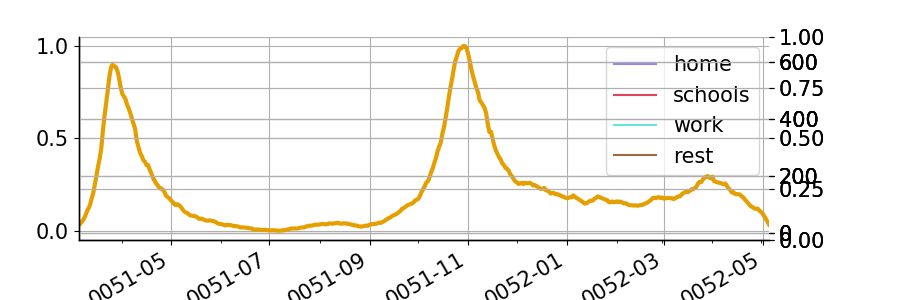

Text(2020-12-29 00:00:00, 0.1, 'end of Christmas holidays')

In [87]:
start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2021, 2, 1, 0, 0)
fig, ax = plt.subplots(figsize=(9,3))
ax.grid(False)
ax.set_xlim(start_date, end_date)
ymin, ymax = (-0.05, 1.05)
ax.set_ylim(ymin, ymax)
color_timeframes(start_date, end_date, ax=ax)
# ax.set_title('test', size=14)

# Add shading denoting calibration periods
label_cal_size = 9
label_cal_move_up = 0.02
arrow_height = ymax
ax.annotate(s='', xy=(start_calibration_wave1,arrow_height), xytext=(end_calibration_wave1,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))
label_cal1_move_right = 44 # days
ax.text(start_calibration_wave1 + pd.Timedelta(days=label_cal1_move_right), \
        ymax + label_cal_move_up, 'calibration wave 1', size=label_cal_size)

ax.annotate(s='', xy=(start_calibration_wave2,arrow_height), xytext=(end_calibration_wave2,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))
label_cal2_move_right = 41 # days
ax.text(start_calibration_wave2 + pd.Timedelta(days=label_cal2_move_right), \
        ymax + label_cal_move_up, 'calibration wave 2', size=label_cal_size)


# Add vertically dashed lines
linestyle='--'
color='k'
linewidth=1
label_size = 8
label_height = 0.1
label_move_left = 6 # days

# information
t0 = pd.Timestamp(2020, 2, 4, 0, 0)
t0_name = 'first diagnosis in Belgium'
ax.axvline(t0, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t0-pd.Timedelta(days=label_move_left), label_height, t0_name, rotation=90, size=label_size)

# wave 1
ax.axvline(t1, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t1-pd.Timedelta(days=label_move_left), label_height, t1_name, rotation=90, size=label_size)

ax.axvline(t2, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t2-pd.Timedelta(days=label_move_left), label_height, t2_name, rotation=90, size=label_size)

ax.axvline(t3, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t3-pd.Timedelta(days=label_move_left), label_height, t3_name, rotation=90, size=label_size)

ax.axvline(t4, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t4-pd.Timedelta(days=label_move_left), label_height, t4_name, rotation=90, size=label_size)

ax.axvline(t5, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t5-pd.Timedelta(days=label_move_left), label_height, t5_name, rotation=90, size=label_size)

# wave 2
ax.axvline(t6, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t6-pd.Timedelta(days=label_move_left), label_height, t6_name, rotation=90, size=label_size)

ax.axvline(t7, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t7-pd.Timedelta(days=label_move_left), label_height, t7_name, rotation=90, size=label_size)

ax.axvline(t8, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t8-pd.Timedelta(days=label_move_left), label_height, t8_name, rotation=90, size=label_size)

ax.axvline(t9, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t9-pd.Timedelta(days=label_move_left), label_height, t9_name, rotation=90, size=label_size)

ax.axvline(t10, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(t10-pd.Timedelta(days=label_move_left), label_height, t10_name, rotation=90, size=label_size)

**Insert prevention parameters**

In [88]:
####################################
# prevention parameters visualised #
####################################

########
# HOME #
########

# NB there is currently an issue with fill_between (?)

prev_linewidth = 1.5
prev_alpha = 0.8
prev_inbetween_alpha = 0.1

### home parameter values visualised
home_label = 'home'
home_color = 'mediumslateblue'
# start to t1
ax.plot((start_date, t1), (prev_home_t1, prev_home_t1), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha, label=home_label)
# t1 to t1 + l
ax.plot((t1, t1+pd.Timedelta(days=l_cal_wave1)), (prev_home_t1, prev_home_t2), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t1 + l to t2
ax.plot((t1+pd.Timedelta(days=l_cal_wave1), t2), (prev_home_t2, prev_home_t2), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t2 to t3
ax.plot((t2, t2), (prev_home_t2, prev_home_t3), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t2, t3), (prev_home_t3, prev_home_t3), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t3 to t3 + l
ax.plot((t3, t3+pd.Timedelta(days=l_cal_wave1)), (prev_home_t3, prev_home_t4), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t3 + l to t4
ax.plot((t3+pd.Timedelta(days=l_cal_wave1), t4), (prev_home_t4, prev_home_t4), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# l4 to t5
ax.plot((t4, t4), (prev_home_t4, prev_home_t5), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t4, t5), (prev_home_t5, prev_home_t5), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t5 to t6
ax.plot((t5, t5), (prev_home_t5, prev_home_t6), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t5, t6), (prev_home_t6, prev_home_t6), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t6 to t6 + l
ax.plot((t6, t6+pd.Timedelta(days=l_cal_wave2)), (prev_home_t6, prev_home_t7), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t6 + l to t7
ax.plot((t6+pd.Timedelta(days=l_cal_wave2), t7), (prev_home_t7, prev_home_t7), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t7 to t8
ax.plot((t7, t7), (prev_home_t7, prev_home_t8), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t7, t8), (prev_home_t8, prev_home_t8), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t8 to t9
ax.plot((t8, t8), (prev_home_t8, prev_home_t9), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t8, t9), (prev_home_t9, prev_home_t9), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t9 to t10
ax.plot((t9, t9), (prev_home_t9, prev_home_t10), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t9, t10), (prev_home_t10, prev_home_t10), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
# t10 to t11
ax.plot((t10, t10), (prev_home_t10, prev_home_t11), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)
ax.plot((t10, end_date), (prev_home_t11, prev_home_t11), linewidth=prev_linewidth,\
        color=home_color, alpha=prev_alpha)

In [89]:
###########
# SCHOOLS #
###########

### schools parameter values visualised
schools_label = 'schools'
schools_color = 'crimson'
schools_open_linestyle = '-.'
# start to t1
ax.plot((start_date, t1), (prev_schools_t1, prev_schools_t1), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, label=schools_label)
ax.plot((start_date, t1), (schools_t1, schools_t1), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t1 to t1 + l
ax.plot((t1, t1+pd.Timedelta(days=l_cal_wave1)), (prev_schools_t1, prev_schools_t2), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t1, t1+pd.Timedelta(days=l_cal_wave1)), (schools_t1, schools_t2), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t1 + l to t2
ax.plot((t1+pd.Timedelta(days=l_cal_wave1), t2), (prev_schools_t2, prev_schools_t2), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t1+pd.Timedelta(days=l_cal_wave1), t2), (schools_t2, schools_t2), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t2 to t3
ax.plot((t2, t2), (prev_schools_t2, prev_schools_t3), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t2, t3), (prev_schools_t3, prev_schools_t3), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t2, t2), (schools_t2, schools_t3), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t2, t3), (schools_t3, schools_t3), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t3 to t3 + l
ax.plot((t3, t3+pd.Timedelta(days=l_cal_wave1)), (prev_schools_t3, prev_schools_t4), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t3, t3+pd.Timedelta(days=l_cal_wave1)), (schools_t3, schools_t4), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t3 + l to t4
ax.plot((t3+pd.Timedelta(days=l_cal_wave1), t4), (prev_schools_t4, prev_schools_t4), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t3+pd.Timedelta(days=l_cal_wave1), t4), (schools_t4, schools_t4), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# l4 to t5
ax.plot((t4, t4), (prev_schools_t4, prev_schools_t5), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t4, t5), (prev_schools_t5, prev_schools_t5), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t4, t4), (schools_t4, schools_t5), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t4, t5), (schools_t5, schools_t5), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t5 to t6
ax.plot((t5, t5), (prev_schools_t5, prev_schools_t6), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t5, t6), (prev_schools_t6, prev_schools_t6), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t5, t5), (schools_t5, schools_t6), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t5, t6), (schools_t6, schools_t6), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t6 to t6 + l
ax.plot((t6, t6+pd.Timedelta(days=l_cal_wave2)), (prev_schools_t6, prev_schools_t7), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t6, t6+pd.Timedelta(days=l_cal_wave2)), (schools_t6, schools_t7), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t6 + l to t7
ax.plot((t6+pd.Timedelta(days=l_cal_wave2), t7), (prev_schools_t7, prev_schools_t7), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t6+pd.Timedelta(days=l_cal_wave2), t7), (schools_t7, schools_t7), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t7 to t8
ax.plot((t7, t7), (prev_schools_t7, prev_schools_t8), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t7, t8), (prev_schools_t8, prev_schools_t8), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t7, t7), (schools_t7, schools_t8), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t7, t8), (schools_t8, schools_t8), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t8 to t9
ax.plot((t8, t8), (prev_schools_t8, prev_schools_t9), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t8, t9), (prev_schools_t9, prev_schools_t9), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t8, t8), (schools_t8, schools_t9), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t8, t9), (schools_t9, schools_t9), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t9 to t10
ax.plot((t9, t9), (prev_schools_t9, prev_schools_t10), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t9, t10), (prev_schools_t10, prev_schools_t10), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t9, t9), (schools_t9, schools_t10), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t9, t10), (schools_t10, schools_t10), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

# t10 to t11
ax.plot((t10, t10), (prev_schools_t10, prev_schools_t11), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t10, end_date), (prev_schools_t11, prev_schools_t11), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha)
ax.plot((t10, t10), (schools_t10, schools_t11), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)
ax.plot((t10, end_date), (schools_t11, schools_t11), linewidth=prev_linewidth,\
        color=schools_color, alpha=prev_alpha, linestyle=schools_open_linestyle)

In [90]:
########
# WORK #
########

### work parameter values visualised
work_label = 'work'
work_color = 'turquoise'
# start to t1
ax.plot((start_date, t1), (prev_work_t1, prev_work_t1), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha, label=work_label)
# t1 to t1 + l
ax.plot((t1, t1+pd.Timedelta(days=l_cal_wave1)), (prev_work_t1, prev_work_t2), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t1 + l to t2
ax.plot((t1+pd.Timedelta(days=l_cal_wave1), t2), (prev_work_t2, prev_work_t2), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t2 to t3
ax.plot((t2, t2), (prev_work_t2, prev_work_t3), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t2, t3), (prev_work_t3, prev_work_t3), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t3 to t3 + l
ax.plot((t3, t3+pd.Timedelta(days=l_cal_wave1)), (prev_work_t3, prev_work_t4), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t3 + l to t4
ax.plot((t3+pd.Timedelta(days=l_cal_wave1), t4), (prev_work_t4, prev_work_t4), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# l4 to t5
ax.plot((t4, t4), (prev_work_t4, prev_work_t5), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t4, t5), (prev_work_t5, prev_work_t5), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t5 to t6
ax.plot((t5, t5), (prev_work_t5, prev_work_t6), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t5, t6), (prev_work_t6, prev_work_t6), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t6 to t6 + l
ax.plot((t6, t6+pd.Timedelta(days=l_cal_wave2)), (prev_work_t6, prev_work_t7), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t6 + l to t7
ax.plot((t6+pd.Timedelta(days=l_cal_wave2), t7), (prev_work_t7, prev_work_t7), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t7 to t8
ax.plot((t7, t7), (prev_work_t7, prev_work_t8), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t7, t8), (prev_work_t8, prev_work_t8), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t8 to t9
ax.plot((t8, t8), (prev_work_t8, prev_work_t9), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t8, t9), (prev_work_t9, prev_work_t9), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t9 to t10
ax.plot((t9, t9), (prev_work_t9, prev_work_t10), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t9, t10), (prev_work_t10, prev_work_t10), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
# t10 to t11
ax.plot((t10, t10), (prev_work_t10, prev_work_t11), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)
ax.plot((t10, end_date), (prev_work_t11, prev_work_t11), linewidth=prev_linewidth,\
        color=work_color, alpha=prev_alpha)

In [91]:
########
# REST #
########

### rest parameter values visualised
rest_label = 'rest'
rest_color = 'saddlebrown'
# start to t1
ax.plot((start_date, t1), (prev_rest_t1, prev_rest_t1), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha, label=rest_label)
# t1 to t1 + l
ax.plot((t1, t1+pd.Timedelta(days=l_cal_wave1)), (prev_rest_t1, prev_rest_t2), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t1 + l to t2
ax.plot((t1+pd.Timedelta(days=l_cal_wave1), t2), (prev_rest_t2, prev_rest_t2), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t2 to t3
ax.plot((t2, t2), (prev_rest_t2, prev_rest_t3), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t2, t3), (prev_rest_t3, prev_rest_t3), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t3 to t3 + l
ax.plot((t3, t3+pd.Timedelta(days=l_cal_wave1)), (prev_rest_t3, prev_rest_t4), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t3 + l to t4
ax.plot((t3+pd.Timedelta(days=l_cal_wave1), t4), (prev_rest_t4, prev_rest_t4), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# l4 to t5
ax.plot((t4, t4), (prev_rest_t4, prev_rest_t5), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t4, t5), (prev_rest_t5, prev_rest_t5), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t5 to t6
ax.plot((t5, t5), (prev_rest_t5, prev_rest_t6), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t5, t6), (prev_rest_t6, prev_rest_t6), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t6 to t6 + l
ax.plot((t6, t6+pd.Timedelta(days=l_cal_wave2)), (prev_rest_t6, prev_rest_t7), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t6 + l to t7
ax.plot((t6+pd.Timedelta(days=l_cal_wave2), t7), (prev_rest_t7, prev_rest_t7), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t7 to t8
ax.plot((t7, t7), (prev_rest_t7, prev_rest_t8), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t7, t8), (prev_rest_t8, prev_rest_t8), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t8 to t9
ax.plot((t8, t8), (prev_rest_t8, prev_rest_t9), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t8, t9), (prev_rest_t9, prev_rest_t9), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t9 to t10
ax.plot((t9, t9), (prev_rest_t9, prev_rest_t10), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t9, t10), (prev_rest_t10, prev_rest_t10), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
# t10 to t11
ax.plot((t10, t10), (prev_rest_t10, prev_rest_t11), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)
ax.plot((t10, end_date), (prev_rest_t11, prev_rest_t11), linewidth=prev_linewidth,\
        color=rest_color, alpha=prev_alpha)

ax.legend(fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
# plt.savefig('test.png', dpi=400)